# Imports

In [2]:
import scipy as sp
import numpy as np
import numpy
import matplotlib as plot
from matplotlib import pyplot
import pandas as pd
from pandas import set_option
set_option('display.width',100)
set_option('display.precision',3)
import sklearn
from pandas import read_csv
import pandas as pd
from pandas.plotting import scatter_matrix
ames = pd.read_csv('Ames.csv')


# Chap 5

### Descriptive Statistics

PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GeoRefNo,Prop_Addr,Latitude,Longitude

SalePrice 
GrLivArea
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
FullBath
KitchenQual
GarageArea

In [355]:
print(type(ames))
print(f"Shape: {ames.shape}")

<class 'pandas.core.frame.DataFrame'>
Shape: (1914, 41)


In [ ]:
print(ames.head(1))

In [ ]:
print(f"Types: \n{ames.dtypes}")

In [63]:
(ames.describe())

,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,GeoRefNo,Latitude,Longitude
count,2.579e+03,2579.000,2579.000,2579.000,2117.000,2579.000,2579.000,2579.000,2579.000,2579.000,...,2579.000,2579.000,2579.000,2579.000,2579.000,2579.000,2579.000,2.559e+03,2482.000,2482.000
mean,7.148e+08,1485.950,178053.442,57.695,68.511,10119.269,6.047,5.618,1970.326,1983.765,...,23.223,2.512,16.163,1.663,48.750,6.152,2007.839,7.137e+08,42.035,-93.643
std,1.887e+08,488.724,75044.983,42.810,22.840,8128.390,1.368,1.122,29.719,20.483,...,64.119,25.299,56.804,30.345,498.821,2.670,1.312,1.886e+08,0.018,0.026
min,5.263e+08,334.000,12789.000,20.000,21.000,1300.000,1.000,1.000,1872.000,1950.000,...,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,5.263e+08,41.986,-93.693
25%,5.314e+08,1112.000,129950.000,20.000,57.000,7406.500,5.000,5.000,1953.000,1965.000,...,0.000,0.000,0.000,0.000,0.000,4.000,2007.000,5.285e+08,42.022,-93.661
50%,5.355e+08,1436.000,159900.000,50.000,68.000,9382.000,6.000,5.000,1972.000,1992.000,...,0.000,0.000,0.000,0.000,0.000,6.000,2008.000,5.355e+08,42.035,-93.640
75%,9.072e+08,1733.000,209750.000,70.000,80.000,11485.500,7.000,6.000,1999.000,2003.000,...,0.000,0.000,0.000,0.000,0.000,8.000,2009.000,9.072e+08,42.049,-93.622
max,1.007e+09,4676.000,755000.000,190.000,313.000,215245.000,10.000,9.000,2010.000,2010.000,...,1012.000,508.000,576.000,800.000,15500.000,12.000,2010.000,1.007e+09,42.063,-93.578


In [ ]:
ames.skew()

### Correlations

In [73]:
numeric_cols = ames.select_dtypes(include=[np.number])
correlation_matrix = numeric_cols.corr(method='pearson')
# print(correlation_matrix)
# pd.DataFrame(correlation_matrix)

# GrLivArea     
# OverallQual
# YearBuilt
# YearRemodAdd
# SalePrice             

### Ames Selected Columns

In [3]:
# Assuming these are the specific columns you want to analyze
# selected_columns = ['SalePrice', 'GrLivArea','LotArea','YearBuilt','YearRemodAdd','FullBath','GarageArea']
selected_columns = ['GrLivArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GarageCars', 'SalePrice'] 
ames_selected_columns = ames[selected_columns]

In [302]:
# Select and calculate the correlation matrix
correlation_matrix = ames_selected_columns.corr(method='pearson')
print(correlation_matrix)


             GrLivArea  OverallQual  TotalBsmtSF  1stFlrSF  GarageCars  SalePrice
GrLivArea        1.000        0.581        0.428     0.534       0.536      0.739
OverallQual      0.581        1.000        0.554     0.506       0.583      0.801
TotalBsmtSF      0.428        0.554        1.000     0.819       0.473      0.682
1stFlrSF         0.534        0.506        0.819     1.000       0.489      0.672
GarageCars       0.536        0.583        0.473     0.489       1.000      0.658
SalePrice        0.739        0.801        0.682     0.672       0.658      1.000


In [303]:
numeric_cols.skew()

PID               0.053
GrLivArea         0.981
SalePrice         1.761
MSSubClass        1.349
LotFrontage       1.170
LotArea          13.072
OverallQual       0.186
OverallCond       0.625
YearBuilt        -0.599
YearRemodAdd     -0.438
MasVnrArea        2.665
BsmtFinSF1        0.803
BsmtFinSF2        3.990
BsmtUnfSF         0.962
TotalBsmtSF       0.515
1stFlrSF          1.043
2ndFlrSF          0.822
LowQualFinSF     13.258
BsmtFullBath      0.527
BsmtHalfBath      3.790
FullBath          0.205
HalfBath          0.671
BedroomAbvGr      0.253
KitchenAbvGr      4.530
TotRmsAbvGrd      0.669
Fireplaces        0.736
GarageYrBlt      -0.629
GarageCars       -0.192
GarageArea        0.247
WoodDeckSF        1.847
OpenPorchSF       2.605
EnclosedPorch     4.041
3SsnPorch        11.828
ScreenPorch       3.997
PoolArea         19.893
MiscVal          21.285
MoSold            0.233
YrSold            0.093
GeoRefNo          0.065
Latitude         -0.542
Longitude        -0.354
dtype: float64

# Chap 6

### Visualisations

### Univariate Plots

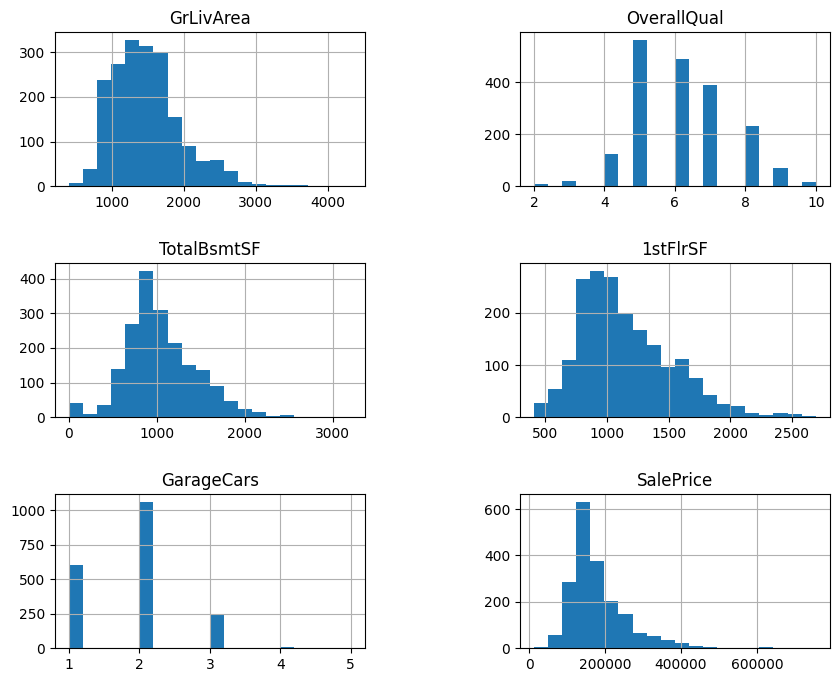

In [304]:
import matplotlib.pyplot as plt

# Create histograms for the selected column
ames_selected_columns.hist(figsize=(10, 8), bins=20)  # Adjust figsize as needed

# Adjust the layout to add more space between the histograms
plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Increase hspace and wspace for more padding
plt.show()  # Display the histograms



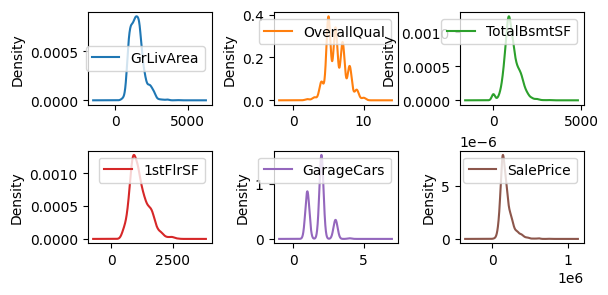

In [305]:
ames_selected_columns.plot(kind='density', subplots=True, layout=(3,3),sharex=False)
# Adjust the layout to add more space between the histograms
plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Increase hspace and wspace for more padding
plt.show()  # Display the histograms

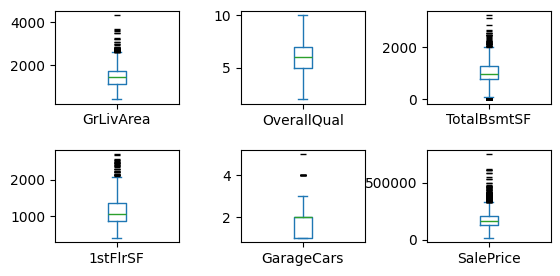

In [306]:
ames_selected_columns.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False,  flierprops=dict(marker='_', color='red', markersize=5) )
# Adjust the layout to add more space between the histograms
plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Increase hspace and wspace for more padding
plt.show()  # Display the histograms

### Multivariate Plots

In [307]:
ames_selected_columns.corr()

,GrLivArea,OverallQual,TotalBsmtSF,1stFlrSF,GarageCars,SalePrice
GrLivArea,1.000,0.581,0.428,0.534,0.536,0.739
OverallQual,0.581,1.000,0.554,0.506,0.583,0.801
TotalBsmtSF,0.428,0.554,1.000,0.819,0.473,0.682
1stFlrSF,0.534,0.506,0.819,1.000,0.489,0.672
GarageCars,0.536,0.583,0.473,0.489,1.000,0.658
SalePrice,0.739,0.801,0.682,0.672,0.658,1.000


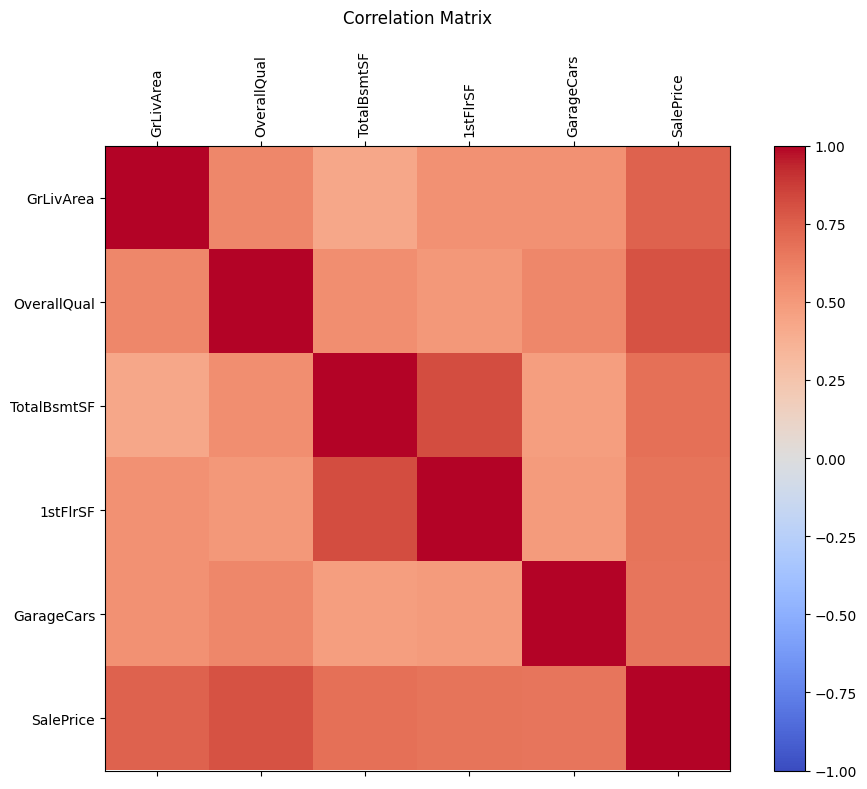

In [308]:
correlations = ames_selected_columns.corr()
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust figsize as needed
cax = ax.matshow(correlations, vmin=-1, vmax=1, cmap='coolwarm')  # Change colormap if desired
fig.colorbar(cax)

# Set ticks
ticks = np.arange(len(selected_columns))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(selected_columns, rotation=90, ha='center')  # Rotate x labels for better readability
ax.set_yticklabels(selected_columns)

# Add title
ax.set_title('Correlation Matrix', pad=20)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


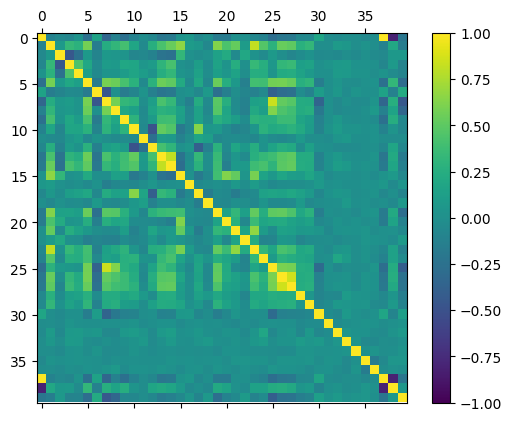

In [7]:
ames = pd.read_csv('Ames.csv').select_dtypes(include=['float64', 'int64']).dropna()
X = ames.drop(columns=['SalePrice'])
y = ames['SalePrice']

fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(X.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
pyplot.show()

### ScatterPlot Matrix

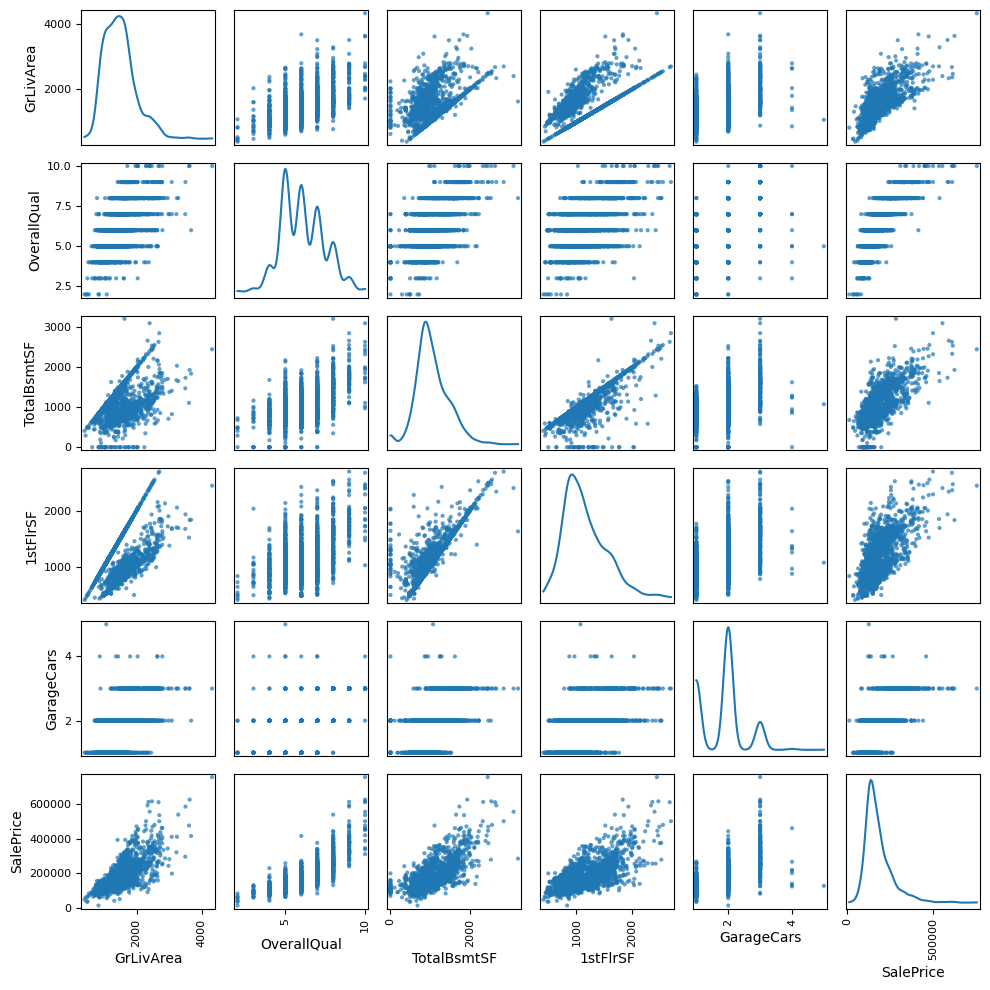

In [309]:
# Create a scatter matrix
scatter_matrix(ames_selected_columns, figsize=(10, 10), diagonal='kde', alpha=0.7, grid=True)

# Adjust layout to improve spacing
plt.tight_layout()  # This will adjust the subplots to fit into the figure area nicely

# Show the plot
plt.show()


# Chap 7

### MinMaxScaler (Rescale)
- Transform / pre-processing tool
- If dataset attributes vary significantly - we can rescale all the values between 0 and 1
- Referred to as normalization
- Good for optimization algorithms like gradient decent;
- Also algorithms that weight inputs like regression and neural networks and distance based measures like KNN

In [310]:
from sklearn.preprocessing import MinMaxScaler
from numpy import set_printoptions
set_printoptions(precision=3)
scalar = MinMaxScaler(feature_range=(0,1))

In [311]:
numeric_columns = ames.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = ames.select_dtypes(include=['object']).columns
print(ames.shape)
print(numeric_columns.shape)
print(numeric_columns)
print(categorical_columns.shape)
print(categorical_columns)
print(ames_selected_columns)
print(ames_selected_columns.shape)

(1914, 41)
(41,)
Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
       'GeoRefNo', 'Latitude', 'Longitude'],
      dtype='object')
(0,)
Index([], dtype='object')
      GrLivArea  OverallQual  TotalBsmtSF  1stFlrSF  GarageCars  SalePrice
1          1049            5       1049.0      1049         1.0     139500
2          1001            5        837.0      1001         1.0     124900
3          1039            4        405.0       717         1.0     114000
4          1665        

In [119]:
# Convert categorical data to numeric (e.g., using one-hot encoding)
ames_encoded = pd.get_dummies(ames, columns=categorical_columns)
print(ames_encoded.shape)

(2579, 2859)


In [121]:
# Rescale the numerical data
scaler = MinMaxScaler()
ames_scaled = scaler.fit_transform(ames[numeric_columns])
print("Rescaled data shape:", ames_scaled.shape)

Rescaled data shape: (2579, 41)


In [123]:
# Rescale the numerical data
scaler = MinMaxScaler()
scaler.fit(ames[numeric_columns])
ames_scaled = scaler.transform(ames[numeric_columns])
print("Rescaled data shape:", ames_scaled.shape)

Rescaled data shape: (2579, 41)


In [129]:
# Rescale the numerical data
scaler = MinMaxScaler()
scaler.fit(ames_selected_columns)
ames_scaled = scaler.transform(ames_selected_columns)
print("Rescaled data shape:", ames_scaled.shape)

Rescaled data shape: (2579, 7)


In [130]:
ames_scaled[1]

array([0.171, 0.165, 0.014, 0.812, 0.567, 0.5  , 0.179])

In [137]:
# Convert scaled array back to DataFrame with appropriate column names
ames_rescaled_df = pd.DataFrame(ames_scaled, columns=ames_selected_columns.columns)
print(ames_rescaled_df.iloc[0])

SalePrice       0.153
GrLivArea       0.120
LotArea         0.031
YearBuilt       0.486
YearRemodAdd    0.000
FullBath        0.250
GarageArea      0.268
Name: 0, dtype: float64


### Standardize (StandardScaler)

In [140]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(ames_selected_columns)

StandardScaler()

In [146]:
ames_scaled = scalar.transform(ames_selected_columns)
print(ames_scaled.shape)
print(ames_scaled[1])

(2579, 7)
[-0.514 -0.894 -0.724  0.46   0.011  0.823 -0.968]


In [147]:
# Convert scaled array back to DataFrame with appropriate column names
ames_rescaled_df = pd.DataFrame(ames_scaled, columns=ames_selected_columns.columns)
print(ames_rescaled_df.iloc[0])

SalePrice      -0.694
GrLivArea      -1.289
LotArea        -0.274
YearBuilt      -1.054
YearRemodAdd   -1.649
FullBath       -1.010
GarageArea     -0.327
Name: 0, dtype: float64


### Normalizer (Normalize Data)
- Unit Vector of 1.

In [157]:
from sklearn.preprocessing import Normalizer
set_printoptions(precision=3)

In [158]:
ames_cleaned = ames_selected_columns.dropna()
scaler = Normalizer()
scaler.fit(ames_cleaned)

Normalizer()

In [161]:
ames_scaled = scaler.transform(ames_cleaned)
print(ames_scaled.shape)
print(ames_scaled[1])

(2578, 7)
[9.993e-01 7.515e-03 3.034e-02 1.421e-02 1.421e-02 1.433e-05 1.905e-03]


In [162]:
# Convert scaled array back to DataFrame with appropriate column names
ames_rescaled_df = pd.DataFrame(ames_scaled, columns=ames_selected_columns.columns)
print(ames_rescaled_df.iloc[0])

SalePrice       9.978e-01
GrLivArea       6.779e-03
LotArea         6.248e-02
YearBuilt       1.535e-02
YearRemodAdd    1.544e-02
FullBath        7.919e-06
GarageArea      3.160e-03
Name: 0, dtype: float64


### Binarize 

In [164]:
from sklearn.preprocessing import Binarizer
scaler = Binarizer()

In [166]:
ames_cleaned = ames_selected_columns.dropna()
scaler.fit(ames_cleaned)

Binarizer()

In [169]:
ames_scaled = scaler.transform(ames_cleaned)
print(ames_scaled.shape)
print(ames_scaled[1])

(2578, 7)
[1. 1. 1. 1. 1. 1. 1.]


In [170]:
# Convert scaled array back to DataFrame with appropriate column names
ames_rescaled_df = pd.DataFrame(ames_scaled, columns=ames_selected_columns.columns)
print(ames_rescaled_df.iloc[0])

SalePrice       1.0
GrLivArea       1.0
LotArea         1.0
YearBuilt       1.0
YearRemodAdd    1.0
FullBath        1.0
GarageArea      1.0
Name: 0, dtype: float64


# Chap 8 

### Feature Selection
- Reduces overfitting
- Improves accuracy
- Reduces training time

### Univariate Selection
- Statistical tests are used to select features with the strongest relationship with the output variable.
- Involves using:
  - **SelectKBest**
  - **f_classi** and **f_regression** functions
  - ANOVA F-value; Analysis of variance

In [255]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression

In [359]:
ames = pd.read_csv('Ames.csv').select_dtypes(include=['float64', 'int64']).dropna()
print(ames.shape)

(1914, 41)


In [274]:
# numeric_columns = ames.select_dtypes(include=['float64', 'int64'])
# print((numeric_columns))
# print((numeric_columns.shape))

In [277]:
# ames = ames[numeric_columns]
# ames = ames.dropna()
# print(ames.shape)

In [281]:
# ames = ames.select_dtypes(include=['float64', 'int64']).dropna()
# print(ames.shape)

In [283]:
X = ames.drop(columns=['SalePrice'])
print(X.shape)
y = ames['SalePrice']
print(y.shape)

(1914, 40)
(1914,)


In [295]:
selector = SelectKBest(score_func=f_regression, k=5)
selector.fit(X, y)

SelectKBest(k=5, score_func=<function f_regression at 0x0000025A2468D000>)

In [296]:
fit = selector.fit(X, y)
print(fit.scores_.shape)
print(fit.scores_)

(40,)
[1.093e+02 2.305e+03 1.002e+01 2.912e+02 2.290e+02 3.418e+03 5.331e+01
 8.222e+02 6.855e+02 7.408e+02 5.573e+02 2.817e-04 6.616e+01 1.666e+03
 1.573e+03 1.263e+02 1.110e+00 1.953e+02 5.635e+00 8.228e+02 1.502e+02
 4.717e+01 1.887e+01 7.290e+02 5.643e+02 7.553e+02 1.457e+03 1.396e+03
 2.499e+02 2.216e+02 3.560e+01 1.854e-01 2.510e+01 1.308e+00 6.235e-01
 1.182e-01 3.262e-01 1.093e+02 1.752e+02 1.381e+02]


In [297]:
features = fit.transform(X)
print(features.shape)

(1914, 5)


In [298]:
print(features)

[[1.049e+03 5.000e+00 1.049e+03 1.049e+03 1.000e+00]
 [1.001e+03 5.000e+00 8.370e+02 1.001e+03 1.000e+00]
 [1.039e+03 4.000e+00 4.050e+02 7.170e+02 1.000e+00]
 ...
 [8.160e+02 6.000e+00 8.160e+02 8.160e+02 1.000e+00]
 [1.724e+03 7.000e+00 7.960e+02 8.060e+02 2.000e+00]
 [1.911e+03 8.000e+00 7.770e+02 1.065e+03 2.000e+00]]


In [299]:
# Get the boolean mask of selected features
selector.get_support()

array([False,  True, False, False, False,  True, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [300]:
# Use the mask to get the names of the selected features
X.columns[selector.get_support()]

Index(['GrLivArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GarageCars'], dtype='object')

### Recursive Feature Selection
- Recursively removes attributes and building a model
- Uses model accuracy in determining the attributes that contribute most
1. Import data - exclude the target variable
2. PCA is sensitive to feature scaling, so normalization or standardization is usually important
3. Run over PCA

In [368]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [314]:
model = LinearRegression()

In [317]:
rfe = RFE(estimator=model, n_features_to_select=5)
fit = rfe.fit(X, y)

In [321]:
print(X.columns[fit.support_])

Index(['OverallQual', 'Fireplaces', 'GarageCars', 'Latitude', 'Longitude'], dtype='object')


### Principle Component Analysis
- Uses linear algebra to transform the dataset into a compressed form
- Known as a **data reduction technique**
- Choose the number of dimensions or principle components in the transformed result.

- **PCA** is useful when you want to reduce dimensionality for visualization, to simplify models, or when working with high-dimensional data where many features may be correlated.
- **Feature selection methods** are more appropriate when you need to identify the most relevant features for predictive modeling, especially when interpretability of the model is important.

### Ames.CSV

In [369]:
ames = pd.read_csv('Ames.csv').select_dtypes(include=['float64', 'int64']).dropna().drop(columns=['SalePrice'])
ames = pd.read_csv('Ames.csv').select_dtypes(include=['float64', 'int64']).dropna().drop(columns=['SalePrice'])
print(ames.shape)

(1914, 40)


In [384]:
scaler = StandardScaler()
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(ames)
X_scaled = pd.DataFrame(X_scaled)
X_scaled

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.953,0.164,0.588,0.072,0.013,0.375,0.500,0.802,0.567,0.093,...,0.000,0.000,0.000,0.0,0.0,0.091,0.75,0.953,0.499,0.313
1,0.967,0.152,0.059,0.134,0.021,0.375,1.000,0.389,0.950,0.000,...,0.042,0.169,0.000,0.0,0.0,0.909,0.25,0.967,0.456,0.848
2,0.023,0.162,0.294,0.202,0.031,0.250,0.875,0.160,0.883,0.000,...,0.166,0.000,0.193,0.0,0.0,0.364,0.75,0.023,0.663,0.868
3,0.020,0.322,0.235,0.168,0.032,0.750,0.625,0.931,0.850,0.000,...,0.000,0.000,0.000,0.0,0.0,0.909,0.75,0.020,0.756,0.656
4,0.960,0.388,0.382,0.147,0.027,0.625,0.500,0.947,0.883,0.312,...,0.175,0.000,0.000,0.0,0.0,0.545,0.75,0.960,0.423,0.228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909,0.015,0.124,1.000,0.151,0.033,0.375,0.500,0.679,0.300,0.000,...,0.000,0.000,0.000,0.0,0.0,0.273,0.50,0.015,0.641,0.232
1910,0.953,0.214,0.000,0.216,0.076,0.250,0.500,0.511,0.000,0.000,...,0.000,0.000,0.000,0.0,0.0,0.545,0.25,0.953,0.476,0.227
1911,0.020,0.105,0.059,0.134,0.033,0.500,0.875,0.420,0.000,0.000,...,0.040,0.000,0.000,0.0,0.0,0.545,0.00,0.020,0.686,0.742
1912,0.960,0.337,0.235,0.140,0.027,0.625,0.500,0.947,0.900,0.119,...,0.000,0.000,0.000,0.0,0.0,0.364,0.00,0.960,0.423,0.225


In [370]:
from sklearn.decomposition import PCA

In [385]:
pca_Transformer = PCA(n_components=2)

In [387]:
pca_Transformer.fit(X_scaled)

PCA(n_components=2)

In [388]:
pca_Transformer.components_.shape

(2, 40)

In [389]:
ames_Reduced = pca_Transformer.transform(X_scaled)

In [390]:
ames_Reduced.shape

(1914, 2)

In [391]:
ames_Reduced = pd.DataFrame(ames_Reduced)

In [392]:
ames_Reduced.head(10)

,0,1
0,0.708,0.217
1,0.859,-0.232
2,-0.337,-0.726
3,-0.755,0.207
4,0.598,0.718
5,-0.784,0.144
6,0.906,-0.044
7,0.621,0.559
8,0.819,0.184
9,0.927,-0.795


array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>]],
      dtype=object)

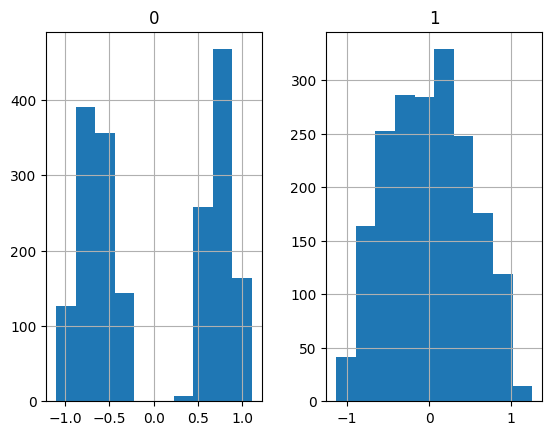

In [393]:
ames_Reduced.hist()

In [ ]:
scatter_matrix(ames_Reduced, figsize=(10, 10), diagonal='kde', alpha=0.7, grid=True)
plt.tight_layout()
plt.show()

## Feature Importance Attribute
- Not all models have this attribute

In [410]:
ames_data = pd.read_csv('Ames.csv').select_dtypes(include=['float64', 'int64']).dropna().drop(columns=['SalePrice'])
ames_data = pd.read_csv('Ames.csv').select_dtypes(include=['float64', 'int64']).dropna().drop(columns=['SalePrice'])

ames_data = pd.read_csv('Ames.csv').select_dtypes(include=['float64', 'int64']).dropna()
X = ames_data.drop(columns=['SalePrice'])
y = ames_data['SalePrice']

In [416]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=100)
model.fit(X, y)
importances = model.feature_importances_

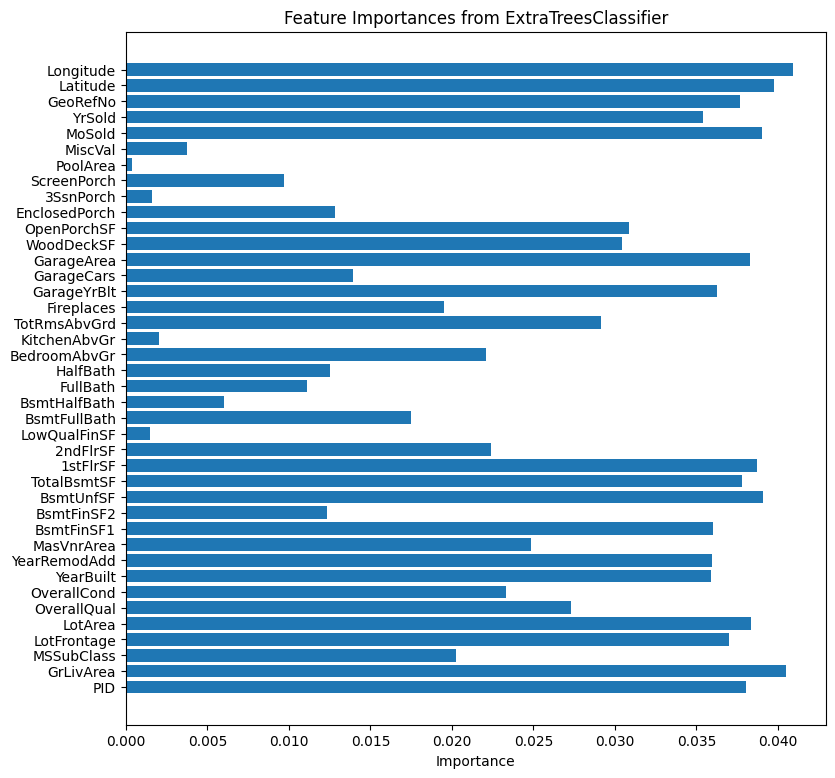

In [432]:
features = ames_data.drop(columns=['SalePrice']).columns
plt.figure(figsize=(10, 9))
plt.barh(features, importances)
plt.xlabel('Importance')
plt.title('Feature Importances from ExtraTreesClassifier')
plt.yticks(rotation=0, ha='right')
plt.subplots_adjust(left=0.2)
plt.show()

In [ ]:
model = ExtraTreesClassifier(n_estimators=100)
model.fit(X, y)
importances = model.feature_importances_
threshold = 0.035
important_features = X.columns[importances > threshold]
important_importances = importances[importances > threshold]
print(len(important_importances))
plt.figure(figsize=(10, 6))
plt.barh(important_features, important_importances)
plt.xlabel('Importance')
plt.title('Feature Importances Greater than 0.035')
plt.yticks(rotation=0, ha='right')
plt.show()


# Chapter 9
- **Evaluation the performance of Machine learning algorithms with resampling**
- Train and Test Sets
- K-Fold Cross Validation
- Leave One Out Cross Validation
- Repeated Random Test-Train Splits

### : Two ways to evaluate algorithms
1. Make predictions for data you already have the target for
2. Use techniques from statistics called **resampling methods** that allow you to make accurate estimates for how well your algorithm will perform on new data

### : New Terms
- What are **resampling methods**?
- "Model evaluation" is an estimate, not a guarantee of performance
- Once we estimate the performance of our algorithm, we can then **re-train** the **final algorithm** on the **entire training dataset** and get it ready for operational use.

### Split into Train and Test Sets
- The simplest method
- Used to evaluate the performance of an algorithm
- Fast and ideal for large datasets and slow algorithms
- Ensure that both splits are representative of the underlying problem
- Use the random_seed parameter to ensure the split is exactly the same when testing different algorithms

In [446]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Declare X and y

In [6]:
ames = pd.read_csv('Ames.csv').select_dtypes(include=['float64', 'int64']).dropna()
print(ames.shape)
X = ames.drop(columns=['SalePrice'])
y = ames['SalePrice']
print(X.shape)
print(y.shape)

(1914, 41)
(1914, 40)
(1914,)


In [447]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [452]:
print(y_train.shape)

(1435,)


In [448]:
model = LinearRegression()

In [449]:
model.fit(X_train, y_train)

LinearRegression()

In [450]:
model.score(X_test, y_test)

0.8638412354121872

### K-Fold Cross Validation
- This approach has less variance than the single Train_Test_Split function
- Split the data in k number of parts, each part is called a **fold**
- The algorithm is trained on k-1 of the parts then tested on the left out **test fold**
- This is repeated for each number of **folds**
- Each **test fold** has a performance score that is summarized using a **mean** and **standard deviation**
- The result of this is a more reliable estimate of the performance of the algorithm on **new data**
- Because; the algorithm is trained and evaluated multiple times of different data
- Be aware of the **k** value, it should be large enough to represent the problem, but allowing enough repetitions
- Datasets in the thousands; *k* values of 3, 5 and 10 are common...

In [453]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [482]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [463]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)

In [468]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.1)

In [472]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)

In [457]:
from sklearn.neural_network import MLPClassifier
model  = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000)

In [478]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=5)

In [480]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor()

In [481]:
results = cross_val_score(model, X, y, cv=KFold(n_splits=10, random_state=0, shuffle=True))
print(results)
print("Accuracy: %.2f%%" % (results.mean()*100.0))
print("Standard Deviation: %.2f%%" % (results.std()*100.0))

[-0.604 -0.665 -0.488 -0.503 -0.798 -0.792 -0.592 -0.611 -0.779 -0.643]
Accuracy: -64.75%
Standard Deviation: 10.66%


### Leave One Out

In [ ]:
from sklearn.model_selection import LeaveOneOut
results = cross_val_score(model, X, y, cv=LeaveOneOut())
print(len(X))
print(len(results))
print((results))
print("Accuracy: %.2f%%" % (results.mean()*100.0))
print("Standard Deviation: %.2f%%" % (results.std()*100.0))

### Repeated Random Test-Train Splits 

In [486]:
from sklearn.model_selection import ShuffleSplit

In [484]:
model = LinearRegression()

In [487]:
results = cross_val_score(model, X, y, cv=ShuffleSplit(n_splits=10, test_size=0.33, random_state=7))
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 87.410% (1.530%)


# Chap 10 - Regression Metrics

### Mean Absolute Error - Negative output
- MAE : The average of the absolute differences between predictions and actual values
- It gives an idea of how wrong the predictions were
- The measure gives an idea of the magnitude of the error
- But no indication if the error was due to over or under predicting

In [493]:
ames = pd.read_csv('Ames.csv').select_dtypes(include=['float64', 'int64']).dropna()
print(ames.shape)
X = ames.drop(columns=['SalePrice'])
y = ames['SalePrice']
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

(1914, 41)
(1914, 40)
(1914,)


In [495]:
kfold = KFold(n_splits=5, random_state=7, shuffle=True)
model = LinearRegression()
scoring = 'neg_mean_absolute_error'
results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
results
# print("MAE: %.3f (%.3f)" % (results.mean(), results.std()))

array([-18778.932, -18169.829, -19786.747, -19649.459, -20706.846])

In [496]:
kfold = KFold(n_splits=5, random_state=7, shuffle=True)
model = LinearRegression()
# scoring = 'neg_mean_absolute_error'
results = cross_val_score(model, X, y, cv=kfold)
results
# print("MAE: %.3f (%.3f)" % (results.mean(), results.std()))

array([0.88 , 0.876, 0.874, 0.891, 0.863])

### Root Mean Squared Error - Negative output

In [497]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = LinearRegression()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print("MSE: %.3f (%.3f)" % (results.mean(), results.std()))

MSE: -729403130.323 (93360007.382)


### $R^2$ Metric - R Squared
- Provides an indication of the "goodness" of fit
- Called the coefficient of determination
- Value between 0 and 1

In [498]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = LinearRegression()
scoring = 'r2'
results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print("R^2: %.3f (%.3f)" % (results.mean(), results.std()))

R^2: 0.881 (0.011)


# Chap 12 - Spot Check

**Algorithm overview**
- Regression algorithms
  - Linear Algorithms
    - Linear Regression
    - Ridge Regression
    - LASSO Linear Regression
  - Non-Linear Algorithms
    - KNN
    - Classification and Regression Trees - CART
    - Support Vector Machines

In [511]:
ames = pd.read_csv('Ames.csv').select_dtypes(include=['float64', 'int64']).dropna()
print(ames.shape)
X = ames.drop(columns=['SalePrice'])
y = ames['SalePrice']
print(X.shape)
print(y.shape)

(1914, 41)
(1914, 40)
(1914,)


### Linear Regression

In [500]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [512]:
kFold = KFold(n_splits=10, random_state=7, shuffle=True)
model = LinearRegression()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)

In [513]:
results

array([-7.792e+08, -6.919e+08, -6.463e+08, -8.497e+08, -8.164e+08,
       -7.722e+08, -7.442e+08, -7.027e+08, -5.087e+08, -7.827e+08])

### Ridge Regression

In [514]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

In [515]:
kFold = KFold(n_splits=10, random_state=7, shuffle=True)
model = Ridge()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)

c:\Users\James\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.21179e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\James\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.18403e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\James\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.1929e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\James\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.18683e-21): result may not be accurate.
  return linalg.solve(

In [516]:
results

array([-7.490e+08, -7.002e+08, -6.266e+08, -8.318e+08, -8.191e+08,
       -7.577e+08, -7.180e+08, -7.258e+08, -5.181e+08, -8.803e+08])

# Chap 13 Compare Algorithms

In [25]:
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [4]:
ames = pd.read_csv('Ames.csv').select_dtypes(include=['float64', 'int64']).dropna()
print(ames.shape)
X = ames.drop(columns=['SalePrice'])
y = ames['SalePrice']
print(X.shape)
print(y.shape)

(1914, 41)
(1914, 40)
(1914,)


In [5]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [6]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

c:\Users\James\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\James\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 139, in __call__
    score = scorer._score(
  File "c:\Users\James\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "c:\Users\James\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "c:\Users\James\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py", line 222, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_

LR: nan (nan)
LDA: 0.013056 (0.008490)
KNN: 0.004698 (0.004334)
CART: 0.010444 (0.008072)
NB: 0.002089 (0.003460)
SVM: 0.011491 (0.009552)


In [ ]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# Chap 14 - Pipelines
- Used to minimize data leakage
- Construct a data preparation and modelling pipeline
- Construct a feature extraction and modelling pipeline

In [11]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [47]:
estimators = []
estimators.append(('standardize', StandardScaler()))
# estimators.append(('lr', LinearRegression()))

In [48]:
# estimators.append(('LR', LinearRegression()))
# estimators.append(('LDA', LinearDiscriminantAnalysis()))
# estimators.append(('KNN', KNeighborsClassifier()))
# estimators.append(('CART', DecisionTreeClassifier()))
# estimators.append(('NB', GaussianNB()))
estimators.append(('SVM', SVC()))

In [49]:
model = Pipeline(estimators)

In [50]:
model

Pipeline(steps=[('standardize', StandardScaler()), ('SVM', SVC())])

In [51]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
results = cross_val_score(model, X, y, cv=kfold)

In [52]:
results

array([0.03645833, 0.02083333, 0.015625  , 0.02083333, 0.01570681,
       0.03141361, 0.0104712 , 0.01570681, 0.02617801, 0.02094241])

In [53]:
results.mean()

0.021416884816753926

### Feature Extraction and Modeling Pipeline

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression

from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

In [19]:
features = []
features.append(('pca', PCA(n_components=5)))
features.append(('select_best', SelectKBest(k=5)))
feature_union = FeatureUnion(features)

In [20]:
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('LinearRegression', LinearRegression()))
model = Pipeline(estimators)

In [21]:
model

Pipeline(steps=[('feature_union',
                 FeatureUnion(transformer_list=[('pca', PCA(n_components=5)),
                                                ('select_best',
                                                 SelectKBest(k=5))])),
                ('LinearRegression', LinearRegression())])

In [22]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
results = cross_val_score(model, X, y, cv=kfold)

In [24]:
print(results)
print(results.mean())

[0.86730873 0.85164898 0.8636199  0.846304   0.85786699 0.81394362
 0.87179666 0.84720824 0.87191233 0.83023313]
0.8521842578782166
